In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv

In [35]:
# Read in original data
csv_path = os.path.join("crime_new02.csv")
org_df = pd.read_csv(csv_path)
org_df.head(10)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude,Neighborhoods
0,2023/03/16 05:30:00 PM,2023/03/16,17:30,2023,Thursday,Assault,Simple Assault,Battery,Open or Active,Potrero Hill,37.762290,-122.401324,54.0
1,2022/07/02 10:53:00 PM,2022/07/02,22:53,2022,Saturday,Assault,Simple Assault,Battery,Open or Active,Bayview Hunters Point,37.719298,-122.390020,88.0
2,2021/07/07 08:18:00 AM,2021/07/07,08:18,2021,Wednesday,Assault,Simple Assault,Battery,Cite or Arrest Adult,Mission,37.753837,-122.418594,53.0
3,2021/06/04 09:40:00 AM,2021/06/04,09:40,2021,Friday,Assault,Simple Assault,Battery,Cite or Arrest Adult,Tenderloin,37.785893,-122.419739,20.0
4,2021/08/16 02:05:00 PM,2021/08/16,14:05,2021,Monday,Missing Person,Missing Person,Found Person,Open or Active,Potrero Hill,37.760026,-122.396284,54.0
5,2019/06/11 04:30:00 PM,2019/06/11,16:30,2019,Tuesday,Rape,Rape,"Rape, Forcible, W/ Force",Open or Active,South of Market,37.775953,-122.408846,32.0
6,2021/07/08 11:22:00 PM,2021/07/08,23:22,2021,Thursday,Assault,Simple Assault,Battery,Open or Active,North Beach,37.800943,-122.407645,106.0
7,2021/06/08 08:50:00 PM,2021/06/08,20:50,2021,Tuesday,Assault,Simple Assault,Battery,Open or Active,Inner Richmond,37.781160,-122.461063,5.0
8,2022/09/25 05:00:00 PM,2022/09/25,17:00,2022,Sunday,Missing Person,Missing Adult,Missing Adult,Open or Active,Mission,37.757232,-122.415626,53.0
9,2021/11/29 09:00:00 PM,2021/11/29,21:00,2021,Monday,Missing Person,Missing Adult,Missing Adult,Open or Active,Noe Valley,37.744363,-122.428959,84.0


In [6]:
# Read the sample data
csv_path = os.path.join("sample_data_by_year.csv")
sample_df = pd.read_csv(csv_path)
sample_df.head(10)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Incident Category,Incident Subcategory,Incident Description,Resolution,Analysis Neighborhood,Latitude,Longitude,Neighborhoods
0,2018/07/21 10:20:00 PM,2018/07/21,22:20,2018,Saturday,Non-Criminal,Other,"Dog, Bite or Attack",Open or Active,Bayview Hunters Point,37.730167,-122.385853,86.0
1,2018/03/20 12:00:00 PM,2018/03/20,12:00,2018,Tuesday,Non-Criminal,Non-Criminal,Found Property,Open or Active,Western Addition,37.780496,-122.432140,97.0
2,2018/11/29 12:28:00 AM,2018/11/29,00:28,2018,Thursday,Drug Offense,Drug Violation,Cocaine Offense,Cite or Arrest Adult,Lone Mountain/USF,37.778008,-122.458638,5.0
3,2018/12/13 11:00:00 AM,2018/12/13,11:00,2018,Thursday,Missing Person,Missing Person,Found Person,Open or Active,Mission,37.758896,-122.414690,53.0
4,2018/05/21 07:00:00 AM,2018/05/21,07:00,2018,Monday,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Property",Open or Active,Oceanview/Merced/Ingleside,37.714055,-122.459035,81.0
5,2018/06/15 04:57:00 PM,2018/06/15,16:57,2018,Friday,Weapons Offense,Weapons Offense,"Weapon, Deadly, Imitation or Laser Scope, Exhi...",Open or Active,Bayview Hunters Point,37.752427,-122.394587,54.0
6,2018/03/26 12:44:00 AM,2018/03/26,00:44,2018,Monday,Warrant,Warrant,"Warrant Arrest, Enroute To Outside Jurisdiction",Cite or Arrest Adult,Tenderloin,37.784453,-122.408493,19.0
7,2018/04/18 01:00:00 PM,2018/04/18,13:00,2018,Wednesday,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, <$50",Open or Active,Golden Gate Park,37.765739,-122.470727,9.0
8,2018/03/08 12:01:00 AM,2018/03/08,00:01,2018,Thursday,Forgery And Counterfeiting,Forgery And Counterfeiting,"Checks, False, Making, Uttering or Possessing",Open or Active,Mission,37.759134,-122.410759,53.0
9,2018/06/02 09:20:00 AM,2018/06/02,09:20,2018,Saturday,Non-Criminal,Non-Criminal,Found Property,Open or Active,Potrero Hill,37.762926,-122.390698,55.0


In [36]:
# group the oringla data
groupby_df=org_df.groupby(['Incident Category', 'Incident Year']).size().reset_index()
groupby_df.columns=['Incident Category', 'Incident Year', 'Count']
groupby_df

,Incident Category,Incident Year,Count
0,Arson,2018,353
1,Arson,2019,303
2,Arson,2020,416
3,Arson,2021,420
4,Arson,2022,391
...,...,...,...
122,Weapons Offense,2020,863
123,Weapons Offense,2021,1070
124,Weapons Offense,2022,1031
125,Weapons Offense,2023,1038


In [37]:
# group the sample data
# groupby_df=sample_df.groupby(['Incident Category', 'Incident Year']).size().reset_index()
# groupby_df.columns=['Incident Category', 'Incident Year', 'Count']
# groupby_df

groupby_sample_df=sample_df.groupby(['Incident Category', 'Incident Year']).size().reset_index()
groupby_sample_df.columns=['Incident Category', 'Incident Year', 'Count']
groupby_sample_df

,Incident Category,Incident Year,Count
0,Arson,2018,4
1,Arson,2019,7
2,Arson,2020,2
3,Arson,2021,6
4,Arson,2022,5
...,...,...,...
252,Weapons Offense,2020,8
253,Weapons Offense,2021,14
254,Weapons Offense,2022,16
255,Weapons Offense,2023,10


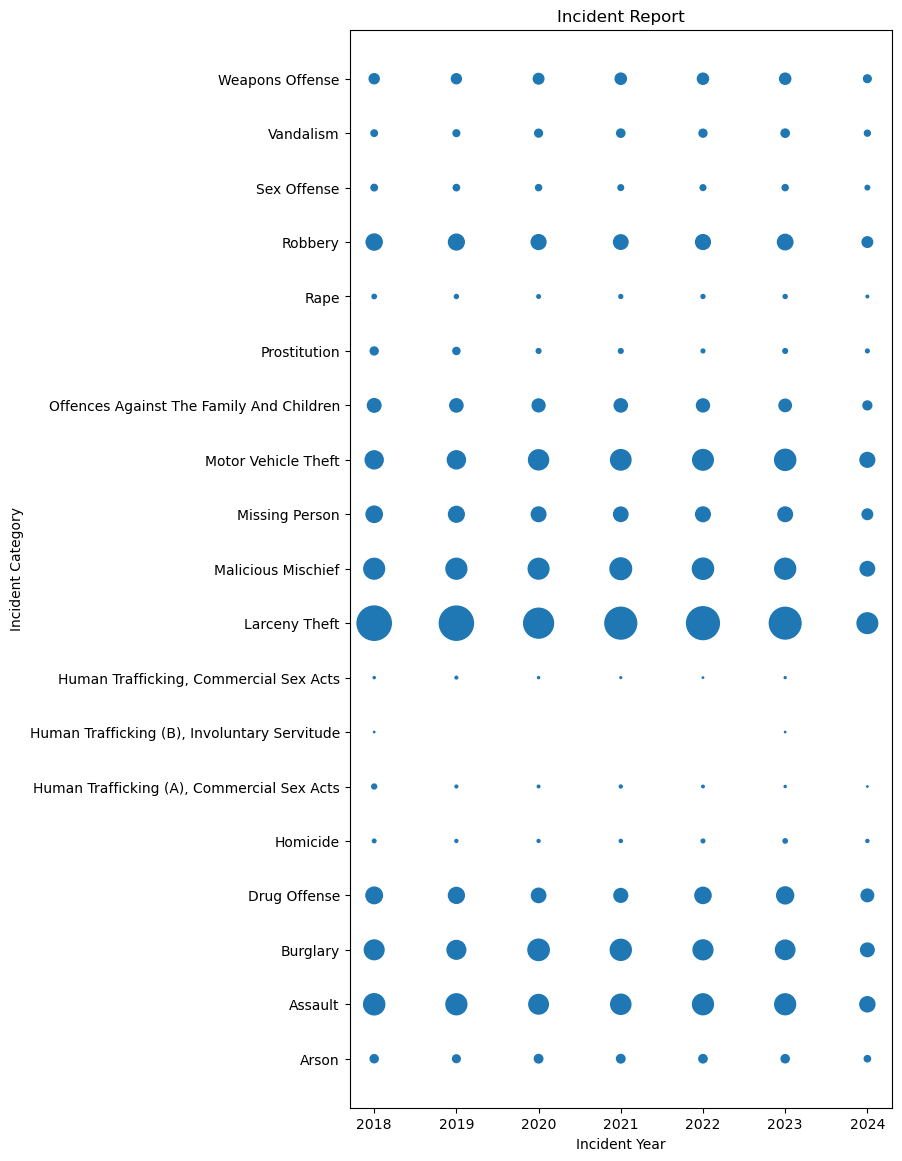

In [41]:

# Historgram
# incident category  or incidient description vs  

# x_axis=np.arange(len(groupby_df))
# tick_locations = [value+.5 for value in x_axis]


# X lim as Report Year ( or Month )

# Y Lim as Number occured
#incident ID
#incident subcategory
#incident category

fig, ax=plt.subplots(figsize=(7, 14))
# Create title, xlabel, and y label
ax.scatter(groupby_df['Incident Year'], groupby_df['Incident Category'], s=groupby_df['Count']**0.6)
plt.title ('Incident Report')
plt.xlabel('Incident Year')
plt.ylabel('Incident Category')

# plt.xlim([0
plt.savefig('bubble_category.png')
plt.show()

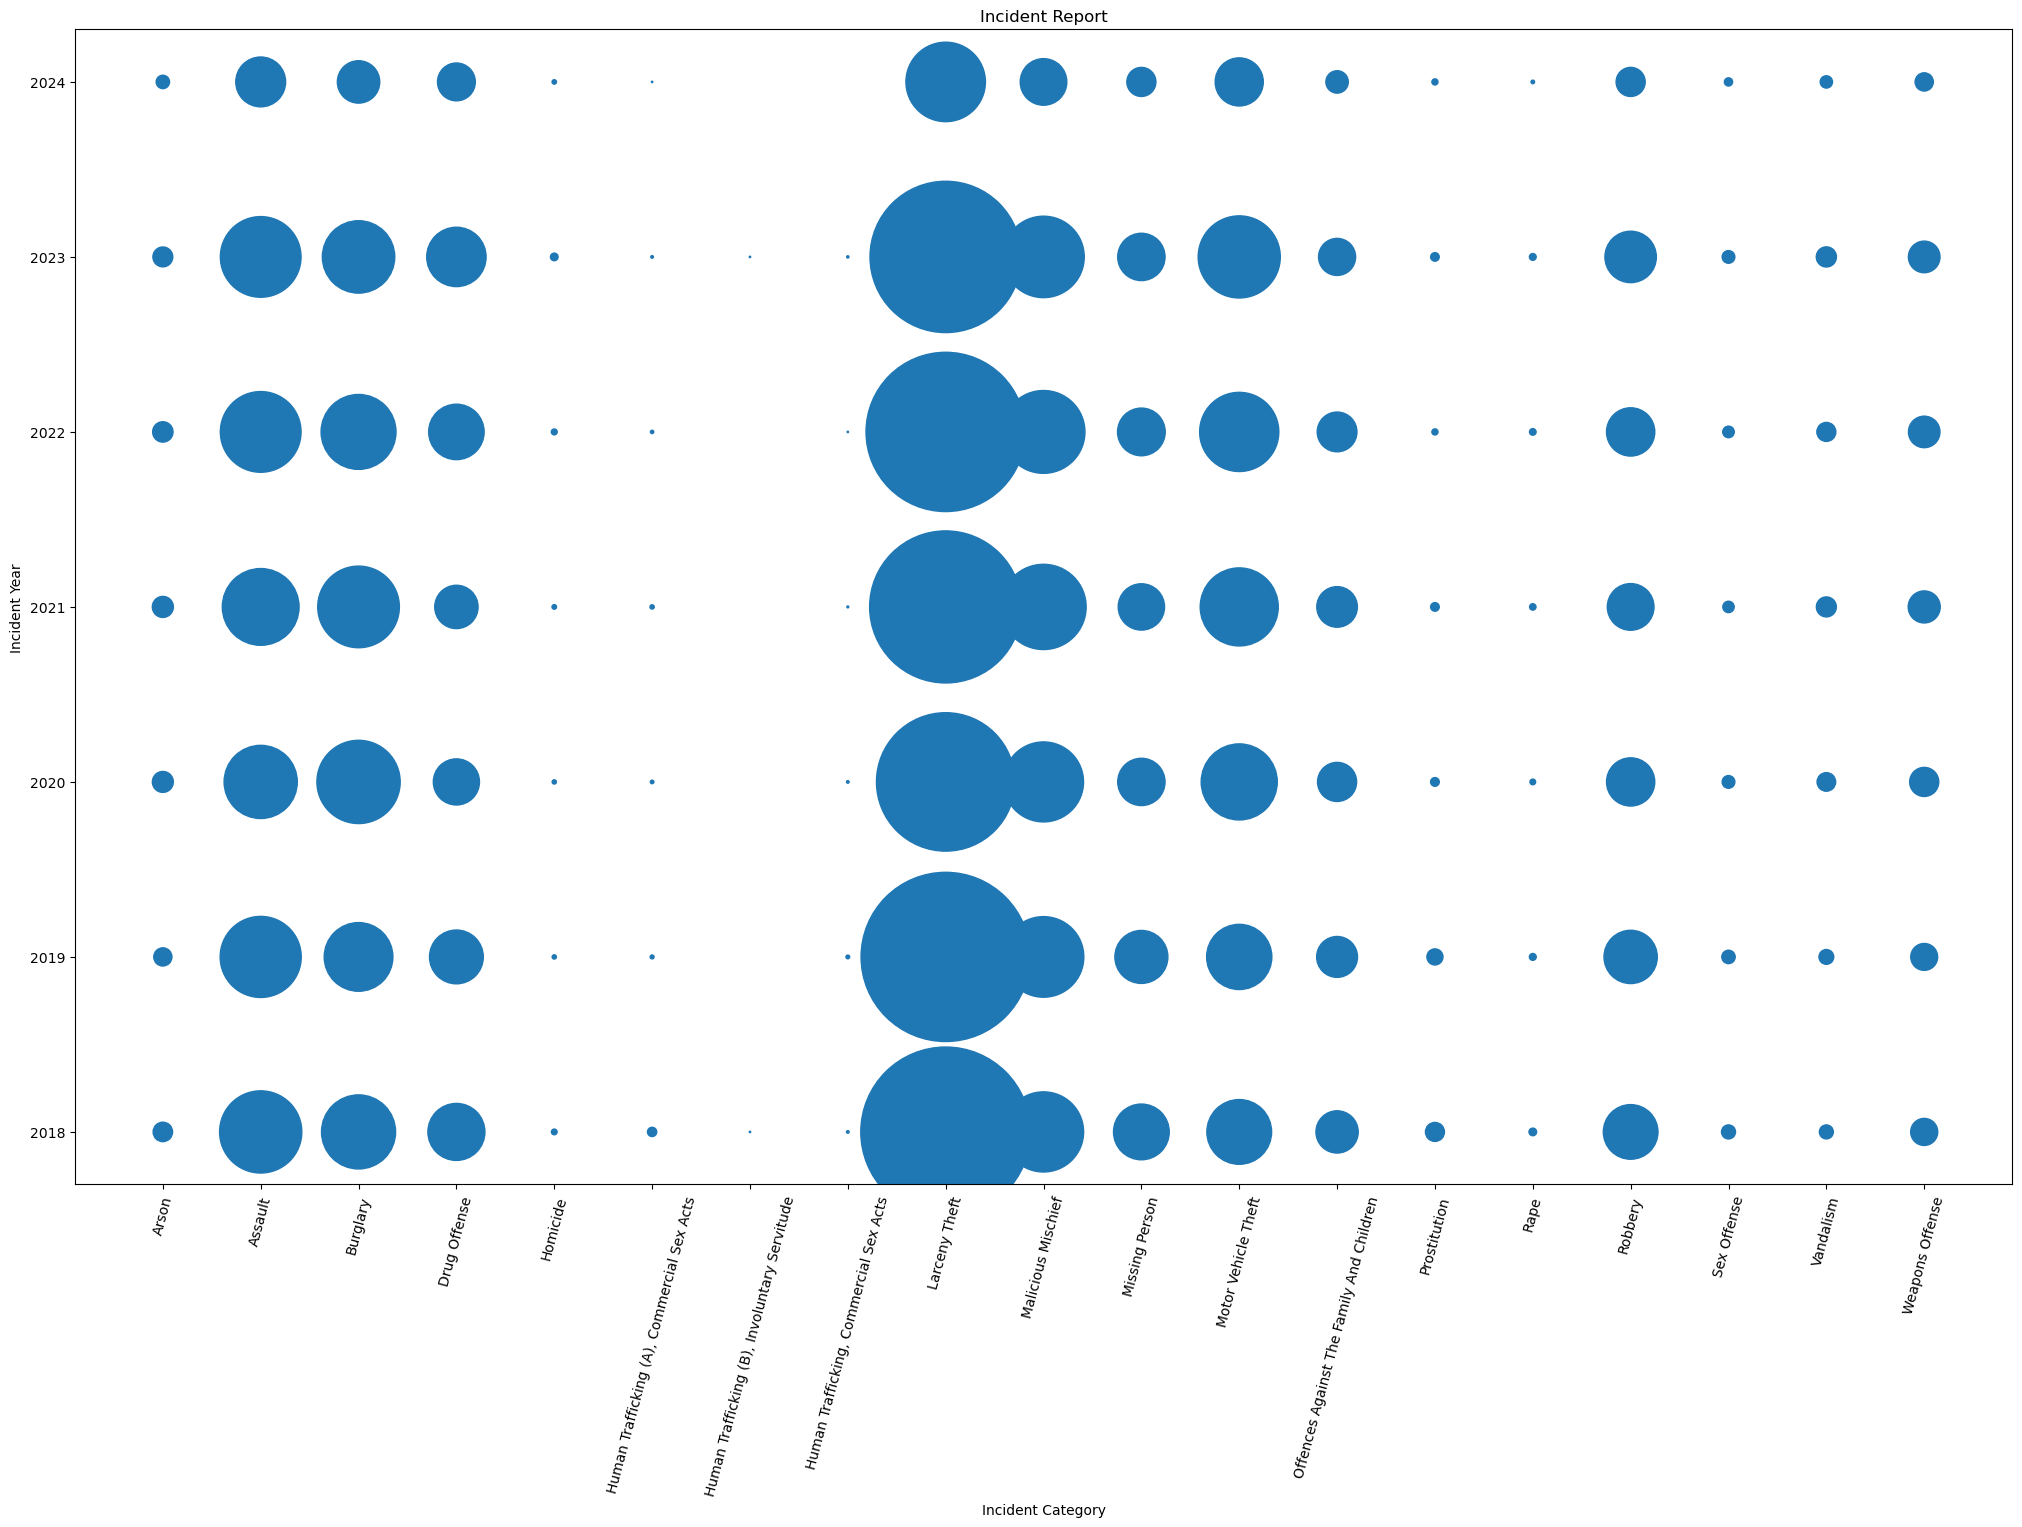

In [40]:

# Historgram
# incident category  or incidient description vs  

# x_axis=np.arange(len(groupby_df))
# tick_locations = [value+.5 for value in x_axis]


# X lim as Report Year ( or Month )

# Y Lim as Number occured
#incident ID
#incident subcategory
#incident category

fig, ax=plt.subplots(figsize=(25, 15))
# Create title, xlabel, and y label
ax.scatter(groupby_df['Incident Category'], groupby_df['Incident Year'], s=groupby_df['Count']**0.9)
plt.title ('Incident Report')
plt.xlabel('Incident Category')
plt.xticks(rotation=75) 
plt.ylabel('Incident Year')

# plt.xlim([0
plt.savefig('output.png')
plt.show()

In [9]:
#finding count for the each individual year and amount on each category
Category_incident_counts = org_df['Incident Category'].value_counts()
print(Category_incident_counts)

Incident Category
Larceny Theft                                   227727
Malicious Mischief                               53872
Assault                                          50745
Burglary                                         45772
Motor Vehicle Theft                              44600
Drug Offense                                     21096
Robbery                                          18512
Missing Person                                   17893
Offences Against The Family And Children         10975
Weapons Offense                                   5768
Arson                                             2407
Vandalism                                         1900
Sex Offense                                        870
Prostitution                                       794
Rape                                               206
Homicide                                           143
Human Trafficking (A), Commercial Sex Acts         110
Human Trafficking, Commercial Sex Acts         

In [10]:
Sample_Category_incident_counts = sample_df['Incident Category'].value_counts()
print(Sample_Category_incident_counts)

Incident Category
Larceny Theft                                 2822
Malicious Mischief                             761
Assault                                        703
Other Miscellaneous                            703
Motor Vehicle Theft                            609
Burglary                                       602
Non-Criminal                                   590
Fraud                                          330
Recovered Vehicle                              297
Warrant                                        267
Drug Offense                                   255
Lost Property                                  247
Robbery                                        239
Suspicious Occ                                 215
Missing Person                                 201
Disorderly Conduct                             180
Miscellaneous Investigation                    133
Offences Against The Family And Children       116
Other                                           96
Traffic Viola

array([2023, 2022, 2021, 2019, 2020, 2024, 2018], dtype=int64)

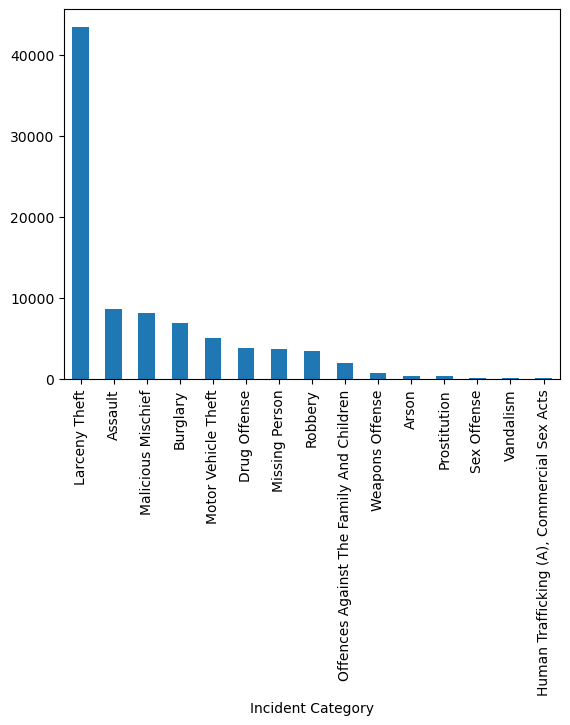

In [65]:
# line chart each year

# x=categories
# y=count
# Category_incident_counts.head(10).plot(kind='bar')
# display(sample_df['Incident Year'].unique())

# sample_df[sample_df['Incident Year']==2018].groupby('Incident Category').size().sort_values(ascending=False).head(10).plot(kind='bar')

display(org_df['Incident Year'].unique())

org_df[org_df['Incident Year']==2018].groupby('Incident Category').size().sort_values(ascending=False).head(15).plot(kind='bar')
plt.xticks(rotation=90)
plt.savefig('category_line.png')

In [69]:
# import seaborn 

category_year_pivot=org_df.pivot_table(index='Incident Category', columns='Incident Year', aggfunc='size', fill_value=0)
category_year_pivot

Incident Year,2018,2019,2020,2021,2022,2023,2024
Incident Category,,,,,,,
Arson,353,303,416,420,391,370,154
Assault,8677,8413,6701,7449,8331,8321,2853
Burglary,6883,5819,8928,8544,7061,6544,1993
Drug Offense,3847,3383,2402,2091,3616,4210,1547
Homicide,23,12,12,14,25,44,13
"Human Trafficking (A), Commercial Sex Acts",68,10,8,12,7,4,1
"Human Trafficking (B), Involuntary Servitude",1,0,0,0,0,1,0
"Human Trafficking, Commercial Sex Acts",4,9,4,2,1,3,0
Larceny Theft,43469,43153,27625,34036,37730,33665,8049


In [17]:
category_year_pct=category_year_pivot.apply(lambda x:x/x.sum())
category_year_pct#.T.pct_change().T

Incident Year,2018,2019,2020,2021,2022,2023,2024
Incident Category,,,,,,,
Arson,0.004047,0.003592,0.005958,0.005381,0.004741,0.004681,0.006864
Assault,0.099478,0.099743,0.095966,0.095435,0.101009,0.105262,0.127167
Burglary,0.078911,0.068989,0.127859,0.109464,0.085611,0.082783,0.088834
Drug Offense,0.044104,0.040108,0.034399,0.026789,0.043842,0.053257,0.068955
Homicide,0.000264,0.000142,0.000172,0.000179,0.000303,0.000557,0.000579
"Human Trafficking (A), Commercial Sex Acts",0.000780,0.000119,0.000115,0.000154,0.000085,0.000051,0.000045
"Human Trafficking (B), Involuntary Servitude",0.000011,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000
"Human Trafficking, Commercial Sex Acts",0.000046,0.000107,0.000057,0.000026,0.000012,0.000038,0.000000
Larceny Theft,0.498355,0.511613,0.395621,0.436063,0.457455,0.425870,0.358770


In [46]:
(category_year_pct*100).map("{:,.2f}%".format)


Incident Year,2018,2019,2020,2021,2022,2023,2024
Incident Category,,,,,,,
Arson,0.40%,0.36%,0.60%,0.54%,0.47%,0.47%,0.69%
Assault,9.95%,9.97%,9.60%,9.54%,10.10%,10.53%,12.72%
Burglary,7.89%,6.90%,12.79%,10.95%,8.56%,8.28%,8.88%
Drug Offense,4.41%,4.01%,3.44%,2.68%,4.38%,5.33%,6.90%
Homicide,0.03%,0.01%,0.02%,0.02%,0.03%,0.06%,0.06%
"Human Trafficking (A), Commercial Sex Acts",0.08%,0.01%,0.01%,0.02%,0.01%,0.01%,0.00%
"Human Trafficking (B), Involuntary Servitude",0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
"Human Trafficking, Commercial Sex Acts",0.00%,0.01%,0.01%,0.00%,0.00%,0.00%,0.00%
Larceny Theft,49.84%,51.16%,39.56%,43.61%,45.75%,42.59%,35.88%


In [47]:
import scipy.stats as sts
def return_slope(input_y): 
    slope, intercept, r, p, std=sts.linregress(range(2018, 2025), input_y)
    return slope

In [48]:
return_slope(category_year_pct.iloc[0].values)

0.0003361229894715872

In [49]:
sts.linregress(range(2018, 2025), category_year_pct.loc['Larceny Theft', :])

LinregressResult(slope=-0.01887166120906107, intercept=38.580162397246156, rvalue=-0.7523043304859481, pvalue=0.05105606904086361, stderr=0.007390869626098115, intercept_stderr=14.93695482841437)

In [55]:
category_trend_slope=category_year_pct.apply(return_slope, axis=1)
display(category_trend_slope.sort_values().map("{:,.4f}".format))

Incident Category
Larceny Theft                                   -0.0189
Missing Person                                  -0.0010
Offences Against The Family And Children        -0.0004
Prostitution                                    -0.0004
Robbery                                         -0.0004
Human Trafficking (A), Commercial Sex Acts      -0.0001
Rape                                            -0.0000
Human Trafficking, Commercial Sex Acts          -0.0000
Human Trafficking (B), Involuntary Servitude    -0.0000
Sex Offense                                      0.0000
Homicide                                         0.0001
Arson                                            0.0003
Burglary                                         0.0005
Vandalism                                        0.0006
Weapons Offense                                  0.0009
Malicious Mischief                               0.0020
Assault                                          0.0035
Drug Offense                  

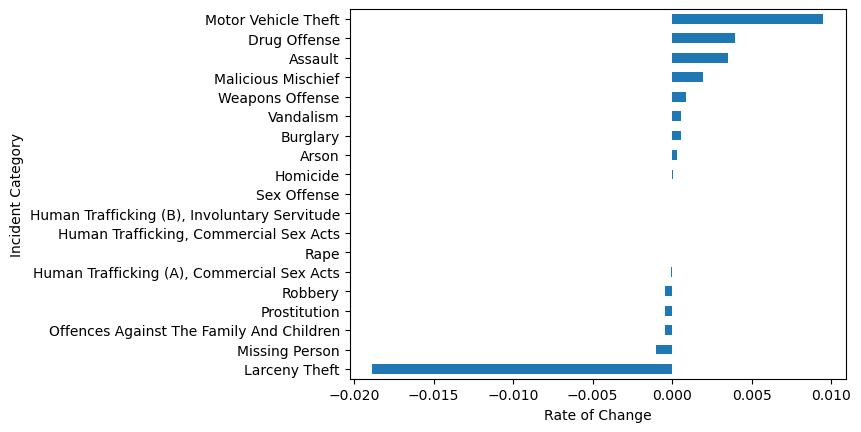

In [62]:
category_trend_slope.sort_values().plot(kind='barh')
plt.xlabel('Rate of Change')
plt.savefig('slope.png')

In [51]:
category_trend_slope.values

array([ 3.36122989e-04,  3.54105610e-03,  5.39677071e-04,  3.93902137e-03,
        6.81155746e-05, -8.46668244e-05, -3.24763084e-07, -1.14370731e-05,
       -1.88716612e-02,  1.95001010e-03, -1.02834468e-03,  9.48872292e-03,
       -4.46010517e-04, -4.45154616e-04, -1.26665621e-05, -4.24851008e-04,
        8.81315055e-06,  5.66045293e-04,  8.87532680e-04])